In [1]:
import numpy as np
import matplotlib.pyplot as plt

from template_funciones_2 import calcula_L, calcula_lambda, metpot1


In [2]:
A = np.array([
   [0, 1, 1, 1, 0, 0, 0, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])
L = calcula_L(A)
L

array([[ 3., -1., -1., -1.,  0.,  0.,  0.,  0.],
       [-1.,  3., -1., -1.,  0.,  0.,  0.,  0.],
       [-1., -1.,  4., -1.,  0., -1.,  0.,  0.],
       [-1., -1., -1.,  4., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  4., -1., -1., -1.],
       [ 0.,  0., -1.,  0., -1.,  4., -1., -1.],
       [ 0.,  0.,  0.,  0., -1., -1.,  3., -1.],
       [ 0.,  0.,  0.,  0., -1., -1., -1.,  3.]])

Para encontrar $\Lambda$ tenemos que encontrar el vector $s^{\Lambda}$ optimo que la minimice. Eso equivale a hallar los autovectores de autovalores mas bajos 

In [11]:
def metpot(A,v,k):
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
    return v

A = np.array([[0.9, 0.075, 0.025], [0.15, 0.8, 0.05], [0.25, 0.25, 0.5]])
v = np.array([1,2,3])

print(metpot(A,v, 1))
print(metpot(A,v, 10))
print(metpot(A,v, 50))
print(metpot(A,v, 100))
print(metpot(A,v, 500))
print(metpot(A,v, 1000))
w = metpot(A,v, 1000)
print(A @ w)
print(np.linalg.eig(A))
avec, aval, _ , avec_aprox = metpot1(A, 1e-10)
avec_aprox

[0.35686199 0.60270025 0.71372398]
[0.56485593 0.58721063 0.57975982]
[0.57735019 0.57735033 0.57735028]
[0.57735027 0.57735027 0.57735027]
[0.57735027 0.57735027 0.57735027]
[0.57735027 0.57735027 0.57735027]
[0.57735027 0.57735027 0.57735027]
EigResult(eigenvalues=array([1.        , 0.74142136, 0.45857864]), eigenvectors=array([[-0.57735027, -0.44371857, -0.03400257],
       [-0.57735027,  0.81130706, -0.13017638],
       [-0.57735027,  0.38065035,  0.99090763]]))


array([[0.59007367, 0.56811502, 0.57363611],
       [0.58661459, 0.57032255, 0.57499175],
       [0.58414172, 0.57205928, 0.5757835 ],
       [0.58235014, 0.57339182, 0.57627262],
       [0.58104098, 0.57439981, 0.57659017],
       [0.58007914, 0.57515601, 0.57680479],
       [0.57937004, 0.57572054, 0.57695425],
       [0.57884617, 0.57614077, 0.57706059],
       [0.57845862, 0.57645305, 0.57713734],
       [0.57817167, 0.57668487, 0.57719327],
       [0.57795911, 0.57685687, 0.57723428],
       [0.5778016 , 0.57698444, 0.57726447],
       [0.57768486, 0.57707903, 0.57728675],
       [0.57759833, 0.57714917, 0.57730322],
       [0.57753418, 0.57720117, 0.57731541],
       [0.57748662, 0.57723973, 0.57732443],
       [0.57745136, 0.57726831, 0.57733112],
       [0.57742522, 0.57728951, 0.57733607],
       [0.57740584, 0.57730522, 0.57733975],
       [0.57739147, 0.57731687, 0.57734247],
       [0.57738082, 0.57732551, 0.57734448],
       [0.57737292, 0.57733191, 0.57734598],
       [0.

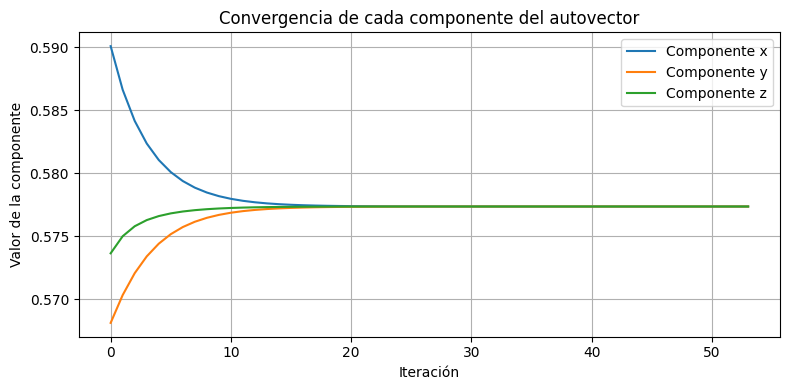

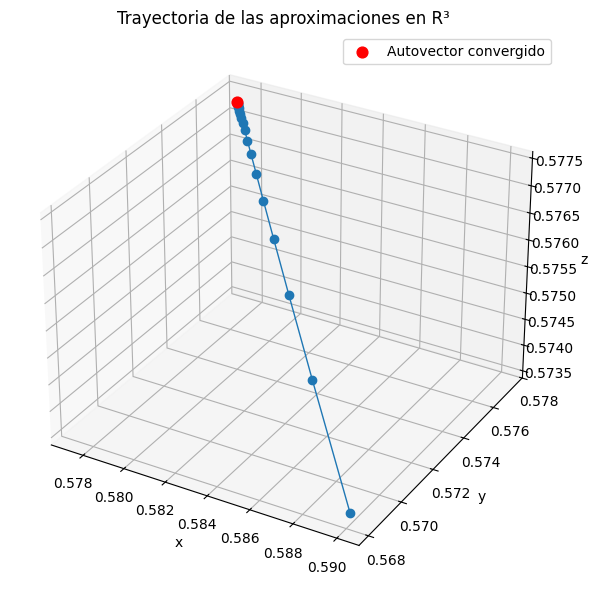

In [12]:
from mpl_toolkits.mplot3d import Axes3D  # sólo para activar el proyector 3D

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(avec_aprox)), avec_aprox[:, 0], label='Componente x')
plt.plot(np.arange(len(avec_aprox)), avec_aprox[:, 1], label='Componente y')
plt.plot(np.arange(len(avec_aprox)), avec_aprox[:, 2], label='Componente z')
plt.xlabel('Iteración')
plt.ylabel('Valor de la componente')
plt.title('Convergencia de cada componente del autovector')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(6, 6))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(avec_aprox[:, 0], avec_aprox[:, 1], avec_aprox[:, 2], marker='o', linewidth=1)
ax.scatter(*avec_aprox[-1], c='red', s=60, label='Autovector convergido')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trayectoria de las aproximaciones en R³')
ax.legend()
plt.tight_layout()
plt.show()